In [472]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
df=pd.read_csv("DataOut.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Education            2236 non-null   object 
 2   Marital_Status       2236 non-null   object 
 3   Income               2236 non-null   float64
 4   Kidhome              2236 non-null   int64  
 5   Teenhome             2236 non-null   int64  
 6   Dt_Customer          2236 non-null   object 
 7   Recency              2236 non-null   int64  
 8   MntWines             2236 non-null   int64  
 9   MntFruits            2236 non-null   int64  
 10  MntMeatProducts      2236 non-null   int64  
 11  MntFishProducts      2236 non-null   int64  
 12  MntSweetProducts     2236 non-null   int64  
 13  MntGoldProds         2236 non-null   int64  
 14  NumDealsPurchases    2236 non-null   int64  
 15  NumWebPurchases      2236 non-null   i

In [473]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,4,7,0,0,0,0,0,0,1,67
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,5,0,0,0,0,0,0,0,70
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,59
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,4,6,0,0,0,0,0,0,0,40
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,43


In [474]:
df = df.set_index('ID')

In [475]:
df['Education'] = np.where(df['Education'] == '2n Cycle', 'Master', df['Education'])
df['Education'].value_counts()

Education
Graduation    1126
Master         571
PhD            485
Basic           54
Name: count, dtype: int64

In [476]:
mar_stat = ['Single', 'Widow', 'Alone', 'Absurd', 'YOLO']
df['Marital_Status'] = np.where(df['Marital_Status'].isin(mar_stat), 'Single', df['Marital_Status'])
df['Marital_Status'] = np.where(df['Marital_Status'].isin(['Married', 'Together']), 'Relationship', 'Single')
df['Marital_Status'].value_counts()

Marital_Status
Relationship    1442
Single           794
Name: count, dtype: int64

In [477]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Kids'].value_counts()

Kids
1    1125
0     637
2     421
3      53
Name: count, dtype: int64

In [478]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], utc=False)
last_enrollment = pd.to_datetime(df['Dt_Customer'].max(), utc=False)
df['Days_Enrolled'] = (last_enrollment-df['Dt_Customer']).dt.days

In [479]:
df.drop(columns = ['Kidhome', 'Teenhome', 'Dt_Customer'], inplace=True)

In [480]:
df['Total_Spend'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df.drop(columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], inplace=True)

In [481]:
df['CouponsAccepted'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'NumWebVisitsMonth'], inplace=True)

In [482]:
df.rename(columns={'NumStorePurchases':'Store_Purchases'}, inplace=True)
df['Non_Store_Purchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']

In [483]:
df['Total_Purchases'] = df['Store_Purchases']+df['Non_Store_Purchases']
df['Store_Purchases_Pct'] = df['Store_Purchases']/df['Total_Purchases']
df['Non_Store_Purchases_Pct'] = 1-df['Store_Purchases_Pct']
df['Customer_Type'] = np.where(df['Store_Purchases_Pct'] >= 0.5, "Offline", "Online")

In [484]:
df.head()


,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,Store_Purchases,Complain,Age,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Non_Store_Purchases,Total_Purchases,Store_Purchases_Pct,Non_Store_Purchases_Pct,Customer_Type
ID,,,,,,,,,,,,,,,,,,,
5524,Graduation,Single,58138.0,58,3,8,10,4,0,67,0,663,1617,1,18,22,0.181818,0.818182,Online
2174,Graduation,Single,46344.0,38,2,1,1,2,0,70,2,113,27,0,2,4,0.500000,0.500000,Offline
4141,Graduation,Relationship,71613.0,26,1,8,2,10,0,59,0,312,776,0,10,20,0.500000,0.500000,Offline
6182,Graduation,Relationship,26646.0,26,2,2,0,4,0,40,1,139,53,0,2,6,0.666667,0.333333,Offline
5324,PhD,Relationship,58293.0,94,5,5,3,6,0,43,1,161,422,0,8,14,0.428571,0.571429,Online


In [485]:
df.drop(columns=['Store_Purchases_Pct', 'Non_Store_Purchases_Pct', 'Non_Store_Purchases', 'NumWebPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'Store_Purchases'], inplace=True)

In [486]:
df['Age'] = np.where(df['Age'] <= 30, "(0,30]", np.where(df['Age'] <= 40, "(30,40]", np.where(df['Age'] <= 50, "(40,50]", np.where(df['Age'] <= 60, "(50, 60]", np.where(df['Age'] <=70, "(60, 70]", (70, ))))))

In [487]:
df['Recency_'] = df['Recency']/14
df['Recency_'] = df['Recency_'].apply(lambda x : str(x))
df.drop(columns = ['Recency'], inplace=True)


In [488]:
df.drop(columns=['Customer_Type', 'Complain'], inplace=True)

In [489]:
df.to_csv("Prepared_Data.csv")

In [490]:
int_list = []
for col in df.columns:
    if df[col].dtypes == int or df[col].dtypes == float:
        int_list.append(col)
# print(int_list)

In [491]:
autoscaler = StandardScaler()
df[int_list] = autoscaler.fit_transform(df[int_list])

In [492]:
df.dtypes

Education             object
Marital_Status        object
Income               float64
NumDealsPurchases    float64
Age                   object
Kids                 float64
Days_Enrolled        float64
Total_Spend          float64
CouponsAccepted      float64
Total_Purchases      float64
Recency_              object
dtype: object

In [493]:
df.reset_index('ID', inplace=True)

In [494]:
df.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_
0,5524,Graduation,Single,0.288195,0.348738,"(60, 70]",-1.264308,1.529793,1.680176,0.620456,1.312080,4.142857142857143
1,2174,Graduation,Single,-0.262715,-0.168700,"(60, 70]",1.395139,-1.191143,-0.962202,-0.501987,-1.186198,2.7142857142857144
2,4141,Graduation,Relationship,0.917627,-0.686137,"(50, 60]",-1.264308,-0.206659,0.282541,-0.501987,1.034493,1.8571428571428572
3,6182,Graduation,Relationship,-1.182829,-0.168700,"(30,40]",0.065416,-1.062517,-0.918994,-0.501987,-0.908611,1.8571428571428572
4,5324,PhD,Relationship,0.295435,1.383614,"(40,50]",0.065416,-0.953679,-0.305762,-0.501987,0.201734,6.714285714285714


In [495]:
df.head()

,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_
0,5524,Graduation,Single,0.288195,0.348738,"(60, 70]",-1.264308,1.529793,1.680176,0.620456,1.312080,4.142857142857143
1,2174,Graduation,Single,-0.262715,-0.168700,"(60, 70]",1.395139,-1.191143,-0.962202,-0.501987,-1.186198,2.7142857142857144
2,4141,Graduation,Relationship,0.917627,-0.686137,"(50, 60]",-1.264308,-0.206659,0.282541,-0.501987,1.034493,1.8571428571428572
3,6182,Graduation,Relationship,-1.182829,-0.168700,"(30,40]",0.065416,-1.062517,-0.918994,-0.501987,-0.908611,1.8571428571428572
4,5324,PhD,Relationship,0.295435,1.383614,"(40,50]",0.065416,-0.953679,-0.305762,-0.501987,0.201734,6.714285714285714


In [496]:
df.to_csv("Prepared_Data_Norm.csv")

In [497]:
df.reset_index(inplace=True)
df.head()

,index,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_
0,0,5524,Graduation,Single,0.288195,0.348738,"(60, 70]",-1.264308,1.529793,1.680176,0.620456,1.312080,4.142857142857143
1,1,2174,Graduation,Single,-0.262715,-0.168700,"(60, 70]",1.395139,-1.191143,-0.962202,-0.501987,-1.186198,2.7142857142857144
2,2,4141,Graduation,Relationship,0.917627,-0.686137,"(50, 60]",-1.264308,-0.206659,0.282541,-0.501987,1.034493,1.8571428571428572
3,3,6182,Graduation,Relationship,-1.182829,-0.168700,"(30,40]",0.065416,-1.062517,-0.918994,-0.501987,-0.908611,1.8571428571428572
4,4,5324,PhD,Relationship,0.295435,1.383614,"(40,50]",0.065416,-0.953679,-0.305762,-0.501987,0.201734,6.714285714285714


In [498]:
obj_col = []
for col in df.columns:
    if df[col].dtypes == object:
        obj_col.append(col)
obj_col

['Education', 'Marital_Status', 'Age', 'Recency_']

In [499]:
# onehotencoder = OneHotEncoder() 
# data = pd.DataFrame(onehotencoder.fit_transform(df[['Age', 'Recency_']]).toarray())
# data = data.reset_index()
# df = pd.merge(left = df, right = data, on = 'index')
# df = df.drop(columns = ['Age'])

In [500]:
# obj_col = []
# for col in df.columns:
#     if df[col].dtypes == object:
#         obj_col.append(col)
# obj_col

In [501]:
label_encoder = LabelEncoder()
for col in obj_col:
    df[col] = label_encoder.fit_transform(df[col])

In [502]:
df.head()

,index,ID,Education,Marital_Status,Income,NumDealsPurchases,Age,Kids,Days_Enrolled,Total_Spend,CouponsAccepted,Total_Purchases,Recency_
0,0,5524,1,1,0.288195,0.348738,4,-1.264308,1.529793,1.680176,0.620456,1.312080,58
1,1,2174,1,1,-0.262715,-0.168700,4,1.395139,-1.191143,-0.962202,-0.501987,-1.186198,38
2,2,4141,1,0,0.917627,-0.686137,3,-1.264308,-0.206659,0.282541,-0.501987,1.034493,26
3,3,6182,1,0,-1.182829,-0.168700,1,0.065416,-1.062517,-0.918994,-0.501987,-0.908611,26
4,4,5324,3,0,0.295435,1.383614,2,0.065416,-0.953679,-0.305762,-0.501987,0.201734,94


In [503]:
# df.drop(columns=[df.columns[0]], inplace=True)
# df.set_index('ID', inplace=True)
# df.head()

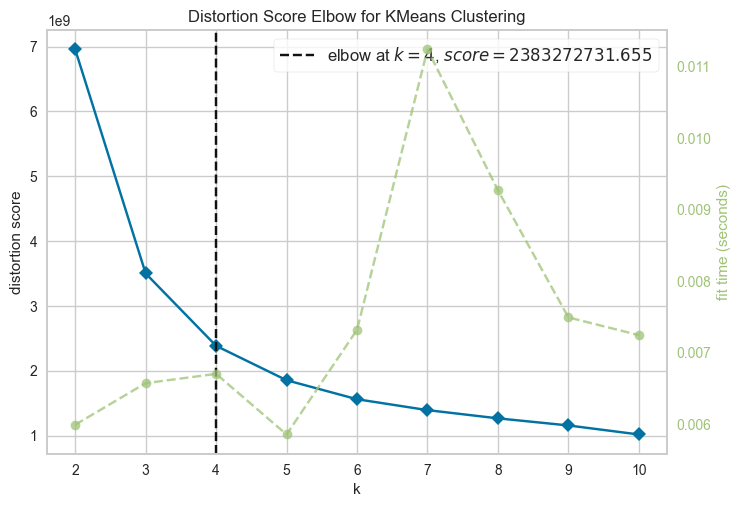

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [504]:
model = KMeans(init = 'k-means++')
visualizer = KElbowVisualizer(model, k = 10, random_state = 42)

visualizer.fit(df)
visualizer.show()